## **Part 3.4 - Application - Sentiment Analysis**

### Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import json
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

### Read dataset

In [ ]:
df_json=pd.read_json('reviewSelected100.json',lines=True)
restaurant_df=pd.DataFrame(df_json)
restaurant_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


### Data Cleaning

In [ ]:
#storing only reviews and the corresponding stars. cleaning as well to make sure no empty entries
reviews=[]
for i in range(len(restaurant_df)):
    reviews.append({'text':restaurant_df['text'][i],'stars':int(restaurant_df['stars'][i])})
reviews[0]

{'text': "We had my Mother's Birthday Party here on 10/29/16. What a Great time we all had. The food, music and waiters were Great!!! Thanks Lyles!!!",
 'stars': 5}

In [ ]:
# creating dataframe of only reviews and stars
reviews_df=pd.DataFrame(reviews)
reviews_df=reviews_df.sample(frac=1)
reviews_df=reviews_df.reset_index(drop=True)
reviews_df

,text,stars
0,I came here based on the Yelp reviews and was ...,2
1,Slow service. Neglected our table repeatedly. ...,2
2,That spicy red sauce needs to be on everything...,4
3,Update to my previous review which was origina...,2
4,First time at an all you can eat sushi buffet....,4
...,...,...
15295,"Good tacos and burritos, Can't beat the 1.99 t...",3
15296,Two stars simply because they eventually broug...,2
15297,Good food and fast service from friendly staff...,5
15298,Wow been going to this place for years and ton...,1


In [ ]:
# grouping reviews based on the number of stars obtained
reviews_df.groupby('stars').count()

,text
stars,
1,2306
2,1372
3,1904
4,3559
5,6159


### Training 3 different models

Choose the best one for sentiment analysis.

In [ ]:
# training 3 different models and choosing the best one for sentiment analysis.
token=RegexpTokenizer(r'[a-zA-Z0-9]+')
ngram_seq = [(1,1), (2,2), (3,3), (1,2), (1,3), (2,3)]
sentiment_results=pd.DataFrame()

# Loop through various ngram_sequence to find the best result
for ngram in ngram_seq:
    cv = CountVectorizer(stop_words='english', ngram_range=ngram, tokenizer = token.tokenize)
    text_counts=cv.fit_transform(reviews_df.text.tolist())
    train_reviews_counts=text_counts[0:12240]
    test_reviews_counts=text_counts[12240:]
    train_stars=reviews_df['stars'][0:12240]
    test_stars=reviews_df['stars'][12240:]
    x_train=train_reviews_counts
    y_train=train_stars
    
    # MNB Classifier
    MNB = MultinomialNB()
    MNB.fit(x_train, y_train)

    # SGD Classifier
    SGDC = SGDClassifier()
    SGDC.fit(x_train, y_train)

    # LSVC Classifier
    LSVC = LinearSVC()
    LSVC.fit(x_train, y_train)
    test_reviews_accuracy_MNB = metrics.accuracy_score(MNB.predict(test_reviews_counts), test_stars)
    test_reviews_accuracy_LSVC = metrics.accuracy_score(LSVC.predict(test_reviews_counts), test_stars)
    test_reviews_accuracy_SGDC = metrics.accuracy_score(SGDC.predict(test_reviews_counts), test_stars)
    
    sentiment_results = sentiment_results.append({
      "ngram": ngram,
      "MNB":  test_reviews_accuracy_MNB,
      "LSVC": test_reviews_accuracy_LSVC,
      "SGDC": test_reviews_accuracy_SGDC,
  }, ignore_index=True)
    
    print("="*50)
    print("NGRAM:",ngram)
    print("MNB, LSVC, SGDC:", test_reviews_accuracy_MNB, test_reviews_accuracy_LSVC, test_reviews_accuracy_SGDC)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NGRAM: (1, 1)
MNB, LSVC, SGDC: 0.569281045751634 0.5526143790849674 0.5627450980392157


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NGRAM: (2, 2)
MNB, LSVC, SGDC: 0.5562091503267974 0.5405228758169934 0.538562091503268


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NGRAM: (3, 3)
MNB, LSVC, SGDC: 0.27124183006535946 0.4300653594771242 0.46111111111111114


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NGRAM: (1, 2)
MNB, LSVC, SGDC: 0.5715686274509804 0.6052287581699346 0.6065359477124183


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NGRAM: (1, 3)
MNB, LSVC, SGDC: 0.5712418300653594 0.6209150326797386 0.615686274509804
NGRAM: (2, 3)
MNB, LSVC, SGDC: 0.4957516339869281 0.538562091503268 0.5356209150326797


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Helper function - Categorise the sentiment based on stars

In [ ]:
# Helper function to categorize sentiment to negative (0), neutral (1), positive (2) based on star rating
def classify_rating(value):
    value=int(value)
    
    if value >= 4:
        return 2
    if value == 3: 
        return 1
    else:
        return 0

In [ ]:
reviews_df['Sentiment_Classification']=reviews_df['stars'].apply(classify_rating)
reviews_df

,text,stars,Sentiment_Classification
0,I came here based on the Yelp reviews and was ...,2,0
1,Slow service. Neglected our table repeatedly. ...,2,0
2,That spicy red sauce needs to be on everything...,4,2
3,Update to my previous review which was origina...,2,0
4,First time at an all you can eat sushi buffet....,4,2
...,...,...,...
15295,"Good tacos and burritos, Can't beat the 1.99 t...",3,1
15296,Two stars simply because they eventually broug...,2,0
15297,Good food and fast service from friendly staff...,5,2
15298,Wow been going to this place for years and ton...,1,0


In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
ngram_seq = [(1,1), (2,2), (3,3), (1,2), (1,3), (2,3)]
sentiment_category_results=pd.DataFrame()
for ngram in ngram_seq:
    cv = CountVectorizer(stop_words='english', ngram_range=ngram, tokenizer = token.tokenize)
    text_counts=cv.fit_transform(reviews_df.text.tolist())
    train_reviews_counts=text_counts[0:12240]
    test_reviews_counts=text_counts[12240:]
    train_stars=reviews_df['Sentiment_Classification'][0:12240]
    test_stars=reviews_df['Sentiment_Classification'][12240:]
    x_train=train_reviews_counts
    y_train=train_stars
    
    # MNB Classifier
    MNB = MultinomialNB()
    MNB.fit(x_train, y_train)

    # SGD Classifier
    SGDC = SGDClassifier()
    SGDC.fit(x_train, y_train)

    # LSVC Classifier
    LSVC = LinearSVC()
    LSVC.fit(x_train, y_train)
    test_reviews_accuracy_MNB = metrics.accuracy_score(MNB.predict(test_reviews_counts), test_stars)
    test_reviews_accuracy_LSVC = metrics.accuracy_score(LSVC.predict(test_reviews_counts), test_stars)
    test_reviews_accuracy_SGDC = metrics.accuracy_score(SGDC.predict(test_reviews_counts), test_stars)
    
    sentiment_category_results = sentiment_category_results.append({
      "ngram": ngram,
      "MNB":  test_reviews_accuracy_MNB,
      "LSVC": test_reviews_accuracy_LSVC,
      "SGDC": test_reviews_accuracy_SGDC,
  }, ignore_index=True)
    
    print("="*50)
    print("NGRAM:",ngram)
    print("MNB, LSVC, SGDC:", test_reviews_accuracy_MNB, test_reviews_accuracy_LSVC, test_reviews_accuracy_SGDC)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NGRAM: (1, 1)
MNB, LSVC, SGDC: 0.7839869281045752 0.7826797385620915 0.7875816993464052


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NGRAM: (2, 2)
MNB, LSVC, SGDC: 0.7006535947712418 0.7477124183006536 0.7578431372549019
NGRAM: (3, 3)
MNB, LSVC, SGDC: 0.22483660130718955 0.6549019607843137 0.6607843137254902


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NGRAM: (1, 2)
MNB, LSVC, SGDC: 0.7797385620915033 0.8248366013071895 0.8107843137254902


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NGRAM: (1, 3)
MNB, LSVC, SGDC: 0.7879084967320261 0.8254901960784313 0.8179738562091503
NGRAM: (2, 3)
MNB, LSVC, SGDC: 0.5287581699346405 0.734640522875817 0.7437908496732026


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Display results of the 3 models

In [ ]:
# Set ngram column to be index and display results
sentiment_results = sentiment_results.set_index('ngram')
print('sentiment_results')
sentiment_results.head(6)

sentiment_results


,LSVC,MNB,SGDC
ngram,,,
"(1, 1)",0.552614,0.569281,0.562745
"(2, 2)",0.540523,0.556209,0.538562
"(3, 3)",0.430065,0.271242,0.461111
"(1, 2)",0.605229,0.571569,0.606536
"(1, 3)",0.620915,0.571242,0.615686
"(2, 3)",0.538562,0.495752,0.535621


In [ ]:
sentiment_category_results=sentiment_category_results.set_index('ngram')
print("sentiment_category_results")
sentiment_category_results.head(6)

sentiment_category_results


,LSVC,MNB,SGDC
ngram,,,
"(1, 1)",0.782680,0.783987,0.787582
"(2, 2)",0.747712,0.700654,0.757843
"(3, 3)",0.654902,0.224837,0.660784
"(1, 2)",0.824837,0.779739,0.810784
"(1, 3)",0.825490,0.787908,0.817974
"(2, 3)",0.734641,0.528758,0.743791


## Conclusion
#### For normal rating: LSVC classifier and ngram (1,3) have the highest accuracy.

#### For sentiment category: : LSVC classifier and ngram(1,3) have the highest accuracy.

## Normal Rating (1 - 5)

In [ ]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,3), tokenizer = token.tokenize)
text_counts=cv.fit_transform(reviews_df.text.tolist())
train_reviews_counts=text_counts[0:12240]
test_reviews_counts=text_counts[12240:]
train_stars=reviews_df['stars'][0:12240]
test_stars=reviews_df['stars'][12240:]
x_train=train_reviews_counts
y_train=train_stars
LSVC = LinearSVC()
LSVC.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

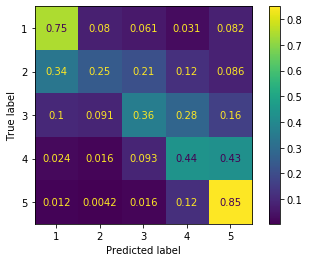

In [ ]:
plot_confusion_matrix(LSVC, test_reviews_counts, test_stars,normalize="true")
plt.show()

# Sentiment Category (0-Negative, 1-Neutral, 2-Positive)

In [ ]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,3), tokenizer = token.tokenize)
text_counts=cv.fit_transform(reviews_df.text.tolist())
train_reviews_counts=text_counts[0:12240]
test_reviews_counts=text_counts[12240:]
train_stars=reviews_df['Sentiment_Classification'][0:12240]
test_stars=reviews_df['Sentiment_Classification'][12240:]
x_train=train_reviews_counts
y_train=train_stars
LSVC = LinearSVC()
LSVC.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

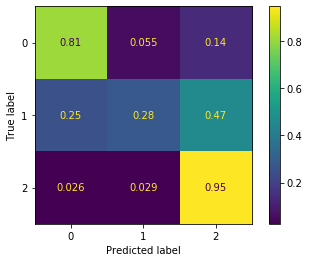

In [ ]:
plot_confusion_matrix(LSVC, test_reviews_counts, test_stars,normalize="true")
plt.show()

In [ ]:
a=LSVC.predict(test_reviews_counts)
a

array([0, 0, 0, ..., 2, 0, 2])

In [ ]:
temp = reviews_df[12240:]
temp['predicted_sentiment_category'] = a
temp

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,stars,Sentiment_Classification,predicted_sentiment_category
12240,Its possible I may vomit tonight. I just ate a...,1,0,0
12241,Went with a group on nine for a Sunday birthda...,2,0,0
12242,Brought my truck in this morning for a wash.Th...,1,0,0
12243,The pancakes were good. When I went to this on...,4,2,2
12244,I just had LASIK 4 days ago by Dr. Wellish and...,5,2,2
...,...,...,...,...
15295,"Good tacos and burritos, Can't beat the 1.99 t...",3,1,2
15296,Two stars simply because they eventually broug...,2,0,2
15297,Good food and fast service from friendly staff...,5,2,2
15298,Wow been going to this place for years and ton...,1,0,0


----------------------------------------------------------------------------------------------------------END--------------------------------------------------------------------------------------------------------------------